In [1]:
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
from labeling_tool import Trie, TrieNode, search_in_trie

In [2]:
df = pd.read_csv('./transform_datn/extracted_ITViec.csv')

In [3]:
df['job_detail_job_requirements'] = df['job_detail_job_requirements'].apply(ast.literal_eval)
df['company_position'] = df['company_position'].apply(ast.literal_eval)
df['job_detail_job_requirements_line'] = df['job_detail_job_requirements_line'].apply(ast.literal_eval)
df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].apply(ast.literal_eval)
df['job_detail_job_level'] = df['job_detail_job_level'].apply(ast.literal_eval)

In [4]:
df.head()

,url,source,crawl_date,company_name,company_position,job_detail_name,job_detail_full_time,job_detail_remote,job_detail_hybrid,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,/it-jobs/fullstack-ruby-angular-javascript-upt...,ITViec,2024-04-17 19:20:23,RIKKEISOFT,"[Tầng 21, Tòa nhà HANDICO, Phạm Hùng, Nam Tu L...","Fullstack (Ruby, Angular/Javascript) upto 3000$",True,False,False,"[Ruby, JavaScript, Angular]","[ROR, 5+ years of overall software development...",[5+ years of overall software development expe...,[]
1,/it-jobs/solution-designer-ho-chi-minh-and-han...,ITViec,2024-04-17 19:20:26,NAB Innovation Centre Vietnam,"[E. Town Central, 11 Doan Van Bo Street, Distr...",Solution Designer (Software Architect/Java/Jav...,False,False,True,"[Software Architect, JavaScript, Java]","[Must have, Experience of, 10+ years in applic...",[10+ years in application design and / or deve...,[]
2,/it-jobs/ky-su-quan-tri-mang-cloud-sunteco-272...,ITViec,2024-04-17 19:20:29,Sunteco,"[Khu Tổ hợp CNC Hanoi Telecom, ICT Park, Lô E4...",Kỹ Sư Quản Trị Mạng Cloud,True,False,False,"[Networking, Linux, System Engineer]",[Kinh nghiệm: tối thiểu từ 2 năm kinh nghiệm t...,[Kinh nghiệm: tối thiểu từ 2 năm kinh nghiệm t...,[]
3,/it-jobs/java-backend-developer-mobile-bank-tp...,ITViec,2024-04-17 19:20:33,"TPIsoftware Co., Ltd","[Lim Tower, 29A Nguyễn Đình Chiểu, Đa Kao, Dis...","Java Backend Developer – Mobile Banking (Java,...",True,False,False,"[Java, Database, AWS]","[Must Have:, More than, 3 years of JAVA, progr...",[3 years of JAVA],[]
4,/it-jobs/senior-junior-java-backend-developer-...,ITViec,2024-04-17 19:20:36,"TPIsoftware Co., Ltd","[Lim Tower, 29A Nguyễn Đình Chiểu, Đa Kao, Dis...","Junior/ Senior Java Developer (Spring, AWS, Da...",True,False,False,"[Java, Database, AWS]","[Must Have:, Graduated from the relevant major...",[3 years],"[junior, senior]"


In [5]:
tmp_df = df.loc[(df['job_detail_full_time'] == False) & (df['job_detail_remote'] == False) & (df['job_detail_hybrid'] == False)]
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   url                               0 non-null      object
 1   source                            0 non-null      object
 2   crawl_date                        0 non-null      object
 3   company_name                      0 non-null      object
 4   company_position                  0 non-null      object
 5   job_detail_name                   0 non-null      object
 6   job_detail_full_time              0 non-null      bool  
 7   job_detail_remote                 0 non-null      bool  
 8   job_detail_hybrid                 0 non-null      bool  
 9   job_detail_job_requirements       0 non-null      object
 10  job_detail_job_requirements_line  0 non-null      object
 11  job_detail_year_of_exp            0 non-null      object
 12  job_detail_job_level              0 non

In [6]:
df.loc[(df['job_detail_remote'] == True)].head()

,url,source,crawl_date,company_name,company_position,job_detail_name,job_detail_full_time,job_detail_remote,job_detail_hybrid,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
6,/it-jobs/remote-senior-nodejs-developer-typesc...,ITViec,2024-04-17 19:20:43,32Co,"[ALL VIETNAM LOCATIONS, Other, Ha Noi, ALL VIE...",Remote Senior Node.JS Developer,False,True,False,"[NodeJS, AWS, MongoDB]","[We're Looking For Someone Who:, Brings 3-4 ye...",[Brings 3-4 years of experience in Node.js dev...,[senior]
9,/it-jobs/home-appliance-c-c-software-engineer-...,ITViec,2024-04-17 19:20:52,LG Electronics Development Vietnam (LGEDV),"[Tầng 32 & 34, tòa nhà Keangnam Landmark 72, đ...",Home Appliance - C/C++ Software Engineer - HN,True,True,True,"[C++, Linux, OOP]",[Bachelor's (or higher) degree in computer sci...,"[, preferred +2 years]",[]
26,/it-jobs/mid-mobile-trading-system-developer-a...,ITViec,2024-04-17 19:21:50,Daoukiwoom Innovation,"[14F, AP Tower, 518B Dien Bien Phu Street, War...",Mid Mobile Trading System Developer (Android/iOS),True,True,False,"[JavaScript, Android, iOS]","[Skills Required, Minimum 2-3 years of profess...",[Minimum 2-3 years of professional experience ...,[]
30,/it-jobs/backend-developer-nodejs-nestjs-tp-ba...,ITViec,2024-04-17 19:22:03,VILL VietNam,"[Trung Tâm Thương Mại Hàng Dừa, Nguyễn Công Tr...","Backend Developer (NodeJS, NestJS) - TP. Bảo Lộc",True,True,False,"[NodeJS, MySQL, TypeScript]","[Có kiến thức về, Microservice, , đã sử ...",[],[]
33,/it-jobs/remote-senior-net-core-developer-c-an...,ITViec,2024-04-17 19:22:12,Emlo Technologies,[68 Circular Road #02-01 Singapore 049422],"Remote - Senior .NET Core Developer (C#, Angular)",False,True,False,"[.NET, C#, Angular, Job description, About Us:...",[5+ years of experience in software developmen...,[5+ years of experience in software developmen...,[senior]


In [7]:
df.iloc[875]['url']

'/it-jobs/software-engineer-wizeline-5555/content?job_index=15&locale=en'

In [8]:
df.iloc[875]

url                                 /it-jobs/software-engineer-wizeline-5555/conte...
source                                                                         ITViec
crawl_date                                                        2024-04-17 20:07:51
company_name                                                                 Wizeline
company_position                    [285  Cách Mạng Tháng 8, District 10, Ho Chi M...
job_detail_name                                 Software Engineer (Java/.Net/Reactjs)
job_detail_full_time                                                            False
job_detail_remote                                                                True
job_detail_hybrid                                                                True
job_detail_job_requirements                                     [Java, ReactJS, .NET]
job_detail_job_requirements_line    [Must-have Skills, Solid experience in softwar...
job_detail_year_of_exp                                

In [9]:
print(df[df['job_detail_job_level'].apply(lambda x: 'intern' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'fresher' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'junior' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'senior' in x)].count())

url                                 0
source                              0
crawl_date                          0
company_name                        0
company_position                    0
job_detail_name                     0
job_detail_full_time                0
job_detail_remote                   0
job_detail_hybrid                   0
job_detail_job_requirements         0
job_detail_job_requirements_line    0
job_detail_year_of_exp              0
job_detail_job_level                0
dtype: int64
url                                 6
source                              6
crawl_date                          6
company_name                        6
company_position                    6
job_detail_name                     6
job_detail_full_time                6
job_detail_remote                   6
job_detail_hybrid                   6
job_detail_job_requirements         6
job_detail_job_requirements_line    6
job_detail_year_of_exp              6
job_detail_job_level                6

# Step 2

In [10]:
df.head()

,url,source,crawl_date,company_name,company_position,job_detail_name,job_detail_full_time,job_detail_remote,job_detail_hybrid,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,/it-jobs/fullstack-ruby-angular-javascript-upt...,ITViec,2024-04-17 19:20:23,RIKKEISOFT,"[Tầng 21, Tòa nhà HANDICO, Phạm Hùng, Nam Tu L...","Fullstack (Ruby, Angular/Javascript) upto 3000$",True,False,False,"[Ruby, JavaScript, Angular]","[ROR, 5+ years of overall software development...",[5+ years of overall software development expe...,[]
1,/it-jobs/solution-designer-ho-chi-minh-and-han...,ITViec,2024-04-17 19:20:26,NAB Innovation Centre Vietnam,"[E. Town Central, 11 Doan Van Bo Street, Distr...",Solution Designer (Software Architect/Java/Jav...,False,False,True,"[Software Architect, JavaScript, Java]","[Must have, Experience of, 10+ years in applic...",[10+ years in application design and / or deve...,[]
2,/it-jobs/ky-su-quan-tri-mang-cloud-sunteco-272...,ITViec,2024-04-17 19:20:29,Sunteco,"[Khu Tổ hợp CNC Hanoi Telecom, ICT Park, Lô E4...",Kỹ Sư Quản Trị Mạng Cloud,True,False,False,"[Networking, Linux, System Engineer]",[Kinh nghiệm: tối thiểu từ 2 năm kinh nghiệm t...,[Kinh nghiệm: tối thiểu từ 2 năm kinh nghiệm t...,[]
3,/it-jobs/java-backend-developer-mobile-bank-tp...,ITViec,2024-04-17 19:20:33,"TPIsoftware Co., Ltd","[Lim Tower, 29A Nguyễn Đình Chiểu, Đa Kao, Dis...","Java Backend Developer – Mobile Banking (Java,...",True,False,False,"[Java, Database, AWS]","[Must Have:, More than, 3 years of JAVA, progr...",[3 years of JAVA],[]
4,/it-jobs/senior-junior-java-backend-developer-...,ITViec,2024-04-17 19:20:36,"TPIsoftware Co., Ltd","[Lim Tower, 29A Nguyễn Đình Chiểu, Đa Kao, Dis...","Junior/ Senior Java Developer (Spring, AWS, Da...",True,False,False,"[Java, Database, AWS]","[Must Have:, Graduated from the relevant major...",[3 years],"[junior, senior]"


In [11]:
time_unit = [
    'years',
    'year',
    'months',
    'month',
    'năm',
    'tháng'
]
pattern = f"(\S+)\s({'|'.join(time_unit)})(?!(?:\s*old|s\sold)\b)"
print(pattern)
def extract_year(year_exp):
    matches = re.findall(pattern, year_exp)
    # print(pattern)
    res = []
    for match in matches:
        res.append(match[0] + ' ' + match[1])
    return res

def get_the_experience(list_string):
    tmp_list_string = [extract_year(string) for string in list_string]
    while len(tmp_list_string) != 0:
        if len(tmp_list_string[0]) == 0:
            tmp_list_string.pop(0)
        else:
            break
    if len(tmp_list_string) == 0:
        return None
    first_line_experience = tmp_list_string[0]
    while len(first_line_experience) != 0:
        if re.search(r'\d+', first_line_experience[0]) is None:
            first_line_experience.pop(0)
        else:
            break
    if len(first_line_experience) == 0:
        return None
    number = int(re.findall(r'\d+', first_line_experience[0])[0])
    if 'tháng' in first_line_experience[0] or \
        'month' in first_line_experience[0] or \
        'months' in first_line_experience[0]:
        number = float(number/12)
    return number


(\S+)\s(years|year|months|month|năm|tháng)(?!(?:\s*old|s\sold)


In [12]:
df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].apply(get_the_experience)

In [13]:
df['job_detail_year_of_exp'].isnull().sum()

246

In [14]:
df['job_detail_year_of_exp'].describe()

count    653.000000
mean       3.379786
std        1.771153
min        0.500000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: job_detail_year_of_exp, dtype: float64

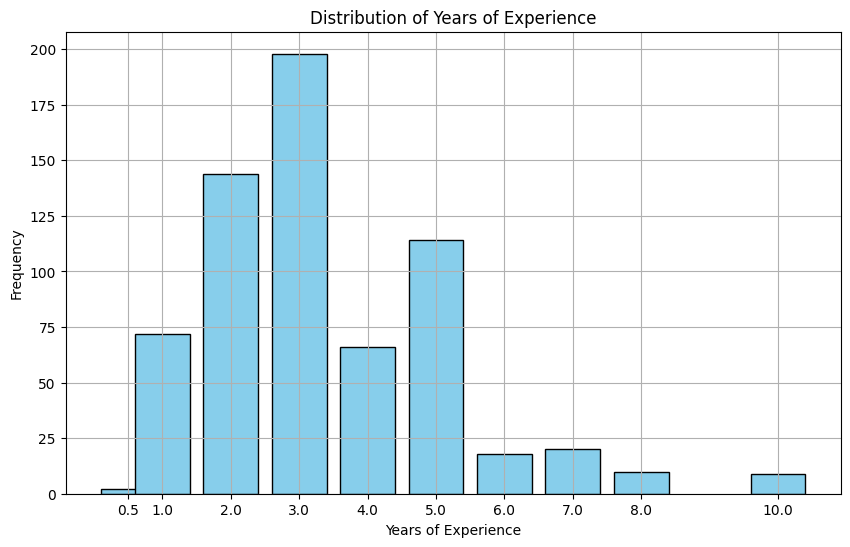

In [15]:
experience_counts = df['job_detail_year_of_exp'].value_counts().sort_index()

years_of_experience = experience_counts.index.tolist()

frequency = experience_counts.values.tolist()

plt.figure(figsize=(10, 6))
plt.bar(years_of_experience, frequency, color='skyblue', edgecolor='black')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Experience')
plt.xticks(years_of_experience)
plt.grid(True)
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x7621708d34f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7621708d3a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7621708d3250>],
 'medians': [<matplotlib.lines.Line2D at 0x7621708d3f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x762170914250>],
 'means': []}

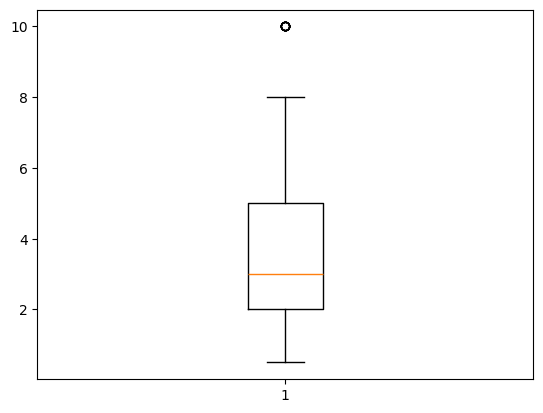

In [16]:
plt.boxplot(df['job_detail_year_of_exp'].dropna())

# Use the highest requirements levels

In [17]:
df['job_detail_job_level'] = df['job_detail_job_level'].map(lambda x: None if len(x) == 0 else x[-1])

In [18]:
df.loc[df['job_detail_job_level'] != None].count()

url                                 899
source                              899
crawl_date                          899
company_name                        899
company_position                    899
job_detail_name                     899
job_detail_full_time                899
job_detail_remote                   899
job_detail_hybrid                   899
job_detail_job_requirements         899
job_detail_job_requirements_line    899
job_detail_year_of_exp              653
job_detail_job_level                296
dtype: int64

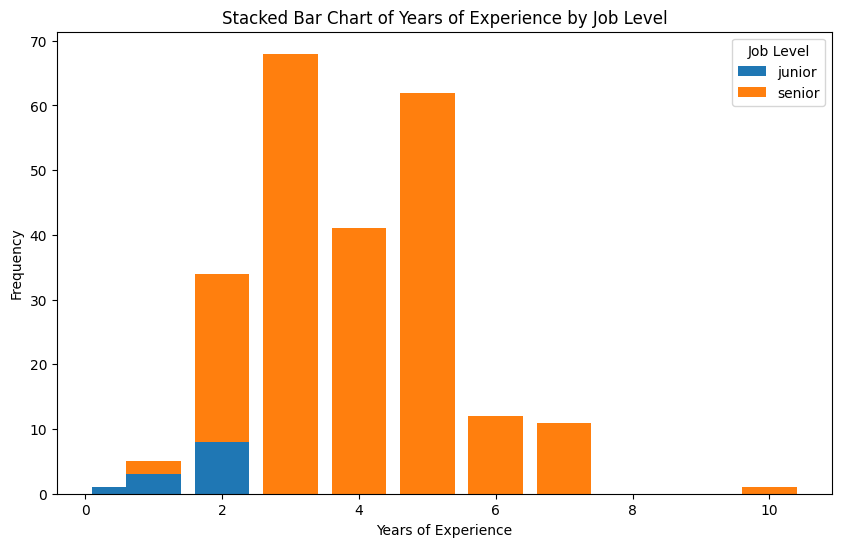

In [19]:
# Order the job levels
job_level_order = ['junior', 'senior']

# Group the DataFrame by 'job_detail_year_of_exp' and 'job_detail_job_level' and count the occurrences
grouped = df.groupby(['job_detail_year_of_exp', 'job_detail_job_level']).size().unstack(fill_value=0)

# Reorder the columns based on the specified order
grouped = grouped[job_level_order]

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Loop through each job level and plot a stacked bar for each year of experience
bottom = None
for job_level in grouped.columns:
    plt.bar(grouped.index, grouped[job_level], label=job_level, bottom=bottom)
    if bottom is None:
        bottom = grouped[job_level]
    else:
        bottom += grouped[job_level]

plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Years of Experience by Job Level')
plt.legend(title='Job Level')
plt.show()

# Salary

In [20]:
# build tree
f = open("skill_list.txt", "r")
skill_list = list(f)
trie_directory = '/trie_struture'
skill_list = [x.lower() for x in skill_list]

# for x in df['job_detail_job_requirements']:
#     skill_list.extend(x)

skill_list = list(set(skill_list))

file = open('skill_list.txt','w')
for skill in skill_list:
	file.write(skill.replace('\n', '').rstrip()+"\n")
file.close()

trie = Trie()
for skill in skill_list:
    trie.insert(skill)

In [21]:
def extract_skill(lines):
    res = []
    for line in lines:
        res.extend(search_in_trie(trie, line))
    return res

In [22]:
df['job_detail_extracted_skill'] = df['job_detail_job_requirements_line'].apply(extract_skill)

In [23]:
df.head()

,url,source,crawl_date,company_name,company_position,job_detail_name,job_detail_full_time,job_detail_remote,job_detail_hybrid,job_detail_job_requirements,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level,job_detail_extracted_skill
0,/it-jobs/fullstack-ruby-angular-javascript-upt...,ITViec,2024-04-17 19:20:23,RIKKEISOFT,"[Tầng 21, Tòa nhà HANDICO, Phạm Hùng, Nam Tu L...","Fullstack (Ruby, Angular/Javascript) upto 3000$",True,False,False,"[Ruby, JavaScript, Angular]","[ROR, 5+ years of overall software development...",5.0,None,"[ruby, software development, ruby, ruby, restf..."
1,/it-jobs/solution-designer-ho-chi-minh-and-han...,ITViec,2024-04-17 19:20:26,NAB Innovation Centre Vietnam,"[E. Town Central, 11 Doan Van Bo Street, Distr...",Solution Designer (Software Architect/Java/Jav...,False,False,True,"[Software Architect, JavaScript, Java]","[Must have, Experience of, 10+ years in applic...",10.0,None,"[application design, architecture, microservic..."
2,/it-jobs/ky-su-quan-tri-mang-cloud-sunteco-272...,ITViec,2024-04-17 19:20:29,Sunteco,"[Khu Tổ hợp CNC Hanoi Telecom, ICT Park, Lô E4...",Kỹ Sư Quản Trị Mạng Cloud,True,False,False,"[Networking, Linux, System Engineer]",[Kinh nghiệm: tối thiểu từ 2 năm kinh nghiệm t...,2.0,None,"[cisco, siem, firewall, pam, ips, vpn, etherne..."
3,/it-jobs/java-backend-developer-mobile-bank-tp...,ITViec,2024-04-17 19:20:33,"TPIsoftware Co., Ltd","[Lim Tower, 29A Nguyễn Đình Chiểu, Đa Kao, Dis...","Java Backend Developer – Mobile Banking (Java,...",True,False,False,"[Java, Database, AWS]","[Must Have:, More than, 3 years of JAVA, progr...",3.0,None,"[java, spring boot, spring cloud, docker, kube..."
4,/it-jobs/senior-junior-java-backend-developer-...,ITViec,2024-04-17 19:20:36,"TPIsoftware Co., Ltd","[Lim Tower, 29A Nguyễn Đình Chiểu, Đa Kao, Dis...","Junior/ Senior Java Developer (Spring, AWS, Da...",True,False,False,"[Java, Database, AWS]","[Must Have:, Graduated from the relevant major...",3.0,senior,"[spring cloud, spring boot, docker, kubernetes..."


In [24]:
df.to_csv('./transform_datn/transformed_ITViec.csv', index=False)